# Formula 1 Data Analysis Using Python
[<img src="https://www.raconteur.net/wp-content/uploads/2018/04/shutterstock_762930772.jpg">](http://google.com/)

## Context

Formula One (also Formula 1 or F1 and officially the FIA Formula One World Championship) is the highest class of single-seat auto racing that is sanctioned by the Fédération Internationale de l'Automobile (FIA). The FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950.

## Content

This dataset contains data from 1950 all the way through the 2022 season, and consists of tables describing constructors, race drivers, lap times, pit stops and more.

## Acknowledgements

The data was downloaded from https://www.kaggle.com/ the conclusion of the 2022 season.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Load the data and assign columns
results = pd.read_csv('results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id','number', 'grid', 'position', 'position_text', 'position_order', 'points', 'laps', 'time', 'milliseconds', 'fastest_lap', 'rank', 'fastest_lap_time', 'fastest_lap_speed', 'status_id'], header = None )
races = pd.read_csv('races.csv', names = ['race_id', 'year', 'round', 'circuit_id', 'name','date', 'time','url'], header = None)
drivers = pd.read_csv('drivers.csv', names =['driver_id', 'driver_ref','number', 'code', 'forename', 'surname', 'dob','nationality', 'url'], header = None)
constructors = pd.read_csv('constructors.csv',  names = ['constructor_id', 'constructor_ref', 'name', 'nationality', 'url'], header = None)

In [3]:
#Merge datasets
df = pd.merge(results, races[['race_id','year','name','round']], on = 'race_id', how = 'left')
df = pd.merge(df, drivers[['driver_id','driver_ref', 'nationality']], on = 'driver_id', how ='left')
df = pd.merge(df, constructors[['constructor_id', 'name', 'nationality']], on = 'constructor_id', how = 'left' )

In [4]:
#Drop columns
df.drop(['number', 'position', 'position_text', 'laps', 'fastest_lap', 'status_id', 'result_id', 'race_id', 'driver_id','constructor_id'], axis = 1, inplace=True)

In [5]:
#Rename columns
df.rename(columns= {'rank': 'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x': 'driver_nationality', 'name_y': 'constructor_name','nationality_y':'constructor_nationality','driver_ref':'driver'}, inplace = True)

In [6]:
#Rearange columns
df = df[['year', 'gp_name', 'round', 'driver','constructor_name','grid','position_order', 'points','time','milliseconds','fastest_lap_rank','fastest_lap_time', 'fastest_lap_speed', 'driver_nationality', 'constructor_nationality']]

In [7]:
#Drop season 2019 because incomplete
df = df[df['year']!= 2019]

In [8]:
#Sort values
df = df.sort_values(by=['year','round','position_order'], ascending = [False,True,True])

In [9]:
#Replace \N values in time col
df.time.replace('\\N',np.nan,inplace = True)
df.milliseconds.replace('\\N',np.nan,inplace = True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace = True)
df.fastest_lap_time.replace('\\N',np.nan,inplace = True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace = True)

In [10]:
#Change datatypes -- ERROR
# df.fastest_lap_speed = df.fastest_lap_speed.astype(float)
# df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
# df.milliseconds = df.milliseconds.astype(float)

In [11]:
#Reset index
df.reset_index(drop = True, inplace= True)

In [12]:
#Shape
print(df.shape)

(25461, 15)


In [13]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25461 entries, 0 to 25460
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     25461 non-null  object
 1   gp_name                  25461 non-null  object
 2   round                    25461 non-null  object
 3   driver                   25461 non-null  object
 4   constructor_name         25461 non-null  object
 5   grid                     25461 non-null  object
 6   position_order           25461 non-null  object
 7   points                   25461 non-null  object
 8   time                     6851 non-null   object
 9   milliseconds             6850 non-null   object
 10  fastest_lap_rank         7212 non-null   object
 11  fastest_lap_time         7011 non-null   object
 12  fastest_lap_speed        7011 non-null   object
 13  driver_nationality       25461 non-null  object
 14  constructor_nationality  25461 non-nul

In [14]:
#Head
df.head(200)

,year,gp_name,round,driver,constructor_name,grid,position_order,points,time,milliseconds,fastest_lap_rank,fastest_lap_time,fastest_lap_speed,driver_nationality,constructor_nationality
0,year,name,round,driverRef,name,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,nationality,nationality
1,2022,Bahrain Grand Prix,1,leclerc,Ferrari,1,1,26,1:37:33.584,5853584,1,1:34.570,206.018,Monegasque,Italian
2,2022,Bahrain Grand Prix,1,zhou,Alfa Romeo,15,10,1,+23.064,5876648,9,1:36.685,201.512,Chinese,Swiss
3,2022,Bahrain Grand Prix,1,mick_schumacher,Haas F1 Team,12,11,0,+32.574,5886158,11,1:36.956,200.948,German,American
4,2022,Bahrain Grand Prix,1,stroll,Aston Martin,19,12,0,+45.873,5899457,15,1:37.146,200.555,Canadian,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021,Russian Grand Prix,15,ricciardo,McLaren,5,4,12,+1:05.607,5506608,9,1:39.124,212.388,Australian,British
196,2021,Russian Grand Prix,15,bottas,Mercedes,16,5,10,+1:07.533,5508534,3,1:38.216,214.352,Finnish,German
197,2021,Russian Grand Prix,15,alonso,Alpine F1 Team,6,6,8,+1:21.321,5522322,6,1:38.686,213.331,Spanish,French
198,2021,Russian Grand Prix,15,norris,McLaren,1,7,7,+1:27.224,5528225,1,1:37.423,216.096,British,British


In [15]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6

([], [])

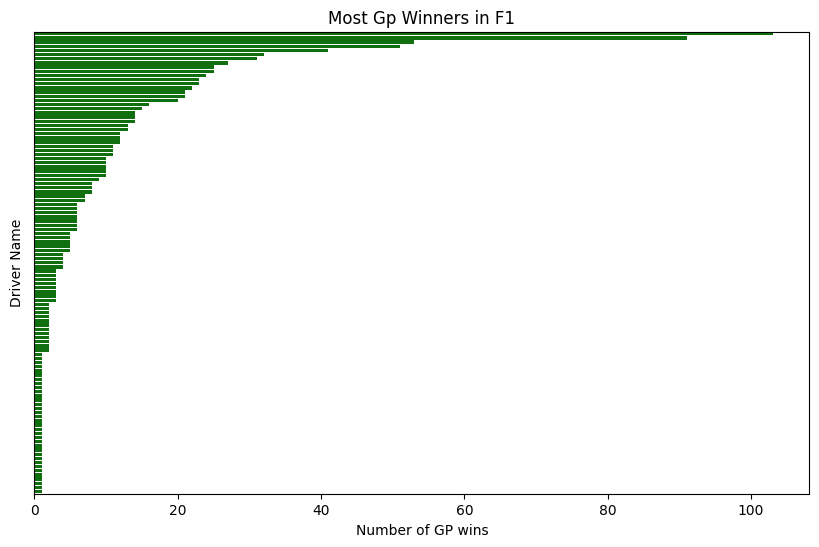

In [16]:
#GP Winners

driver_winner = df.loc[df['position_order']=='1'].groupby('driver')['position_order'].count().sort_values(ascending = False).to_frame().reset_index()

#Barplot
sb.barplot(x =driver_winner['position_order'],y = driver_winner['driver'], color = 'green')
plt.title('Most Gp Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])


In [17]:
#create new datafraeme of top 10 GP winners
top10Drivers = driver_winner.head(10)

print(top10Drivers)

               driver  position_order
0            hamilton             103
1  michael_schumacher              91
2              vettel              53
3               prost              51
4               senna              41
5              alonso              32
6             mansell              31
7             stewart              27
8               clark              25
9               lauda              25


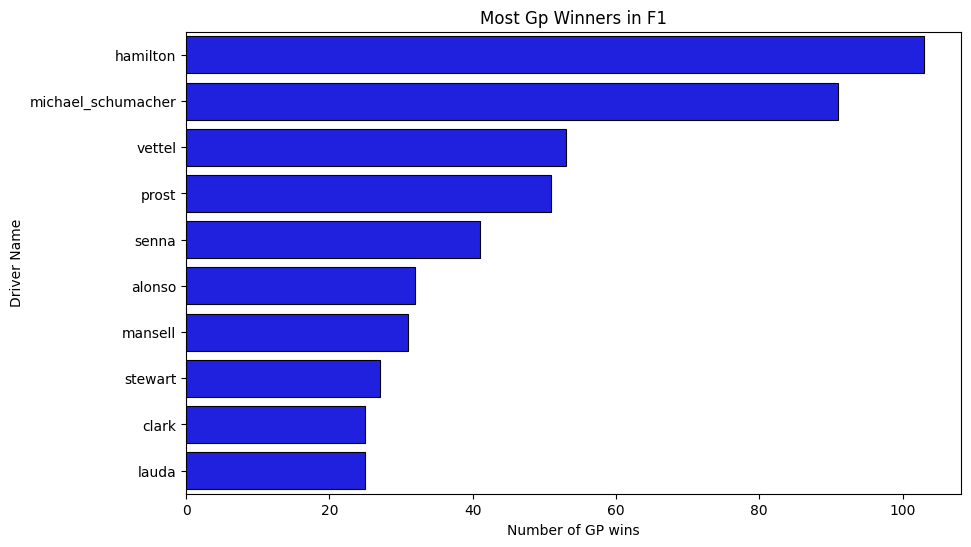

In [18]:
#Top 10 driver plot
sb.barplot(data = top10Drivers, y = 'driver', x = 'position_order', color = 'blue', linewidth = .8, edgecolor = 'black')
plt.title('Most Gp Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins');


([], [])

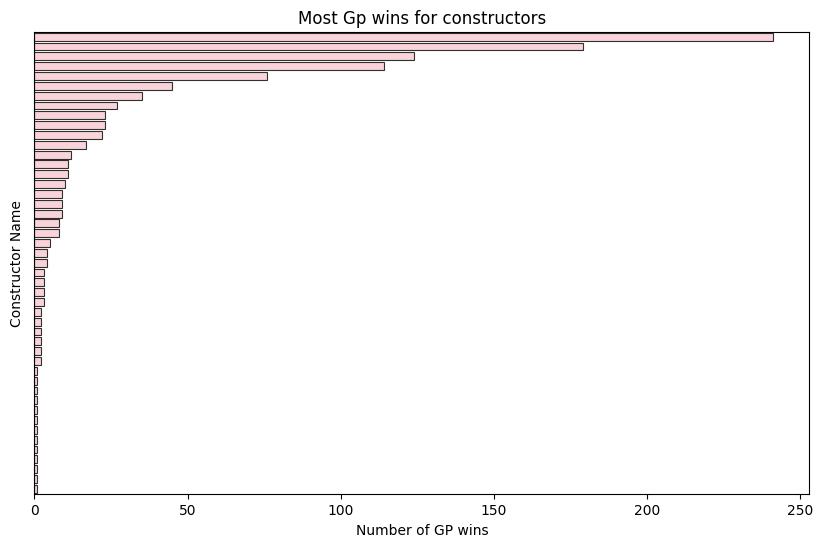

In [19]:
#GP Constructors winners

constructor_winner = df.loc[df['position_order']=='1'].groupby('constructor_name')['position_order'].count().sort_values(ascending = False).to_frame().reset_index()

#Barplot
sb.barplot(data = constructor_winner , x = 'position_order', y = 'constructor_name', color = 'pink', alpha = 0.8, linewidth = .8 , edgecolor = 'black')
plt.title('Most Gp wins for constructors')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')
plt.yticks([])


In [20]:
#Top 10 GP constructors winners
top10constructors = constructor_winner.head(10)

print(top10constructors)

  constructor_name  position_order
0          Ferrari             241
1          McLaren             179
2         Mercedes             124
3         Williams             114
4         Red Bull              76
5       Team Lotus              45
6          Renault              35
7         Benetton              27
8          Brabham              23
9          Tyrrell              23


Text(0.5, 0, 'Number of GP wins')

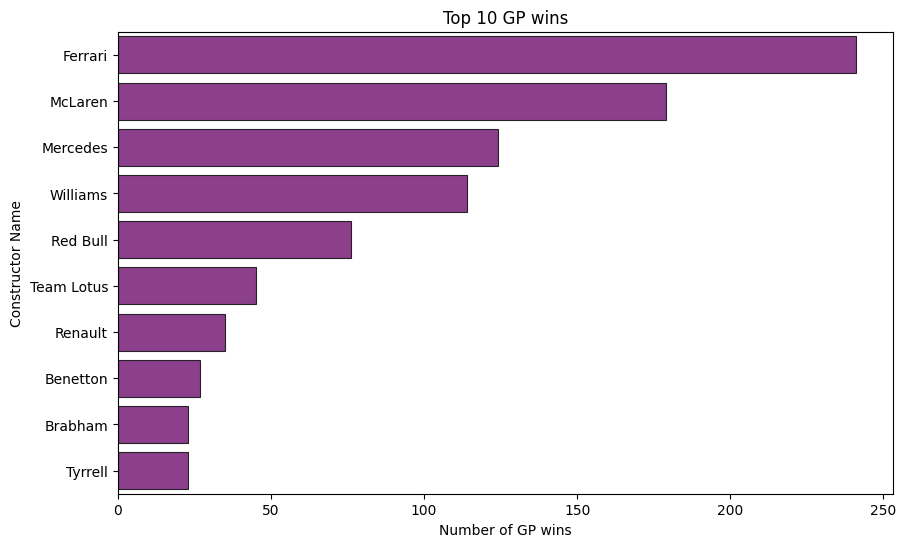

In [21]:
#Barplot of 10 top constructors
sb.barplot(data = top10constructors, y = 'constructor_name', x = 'position_order', color = 'purple', alpha = 0.8, linewidth = .8,edgecolor = 'black' )

plt.title('Top 10 GP wins')
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')


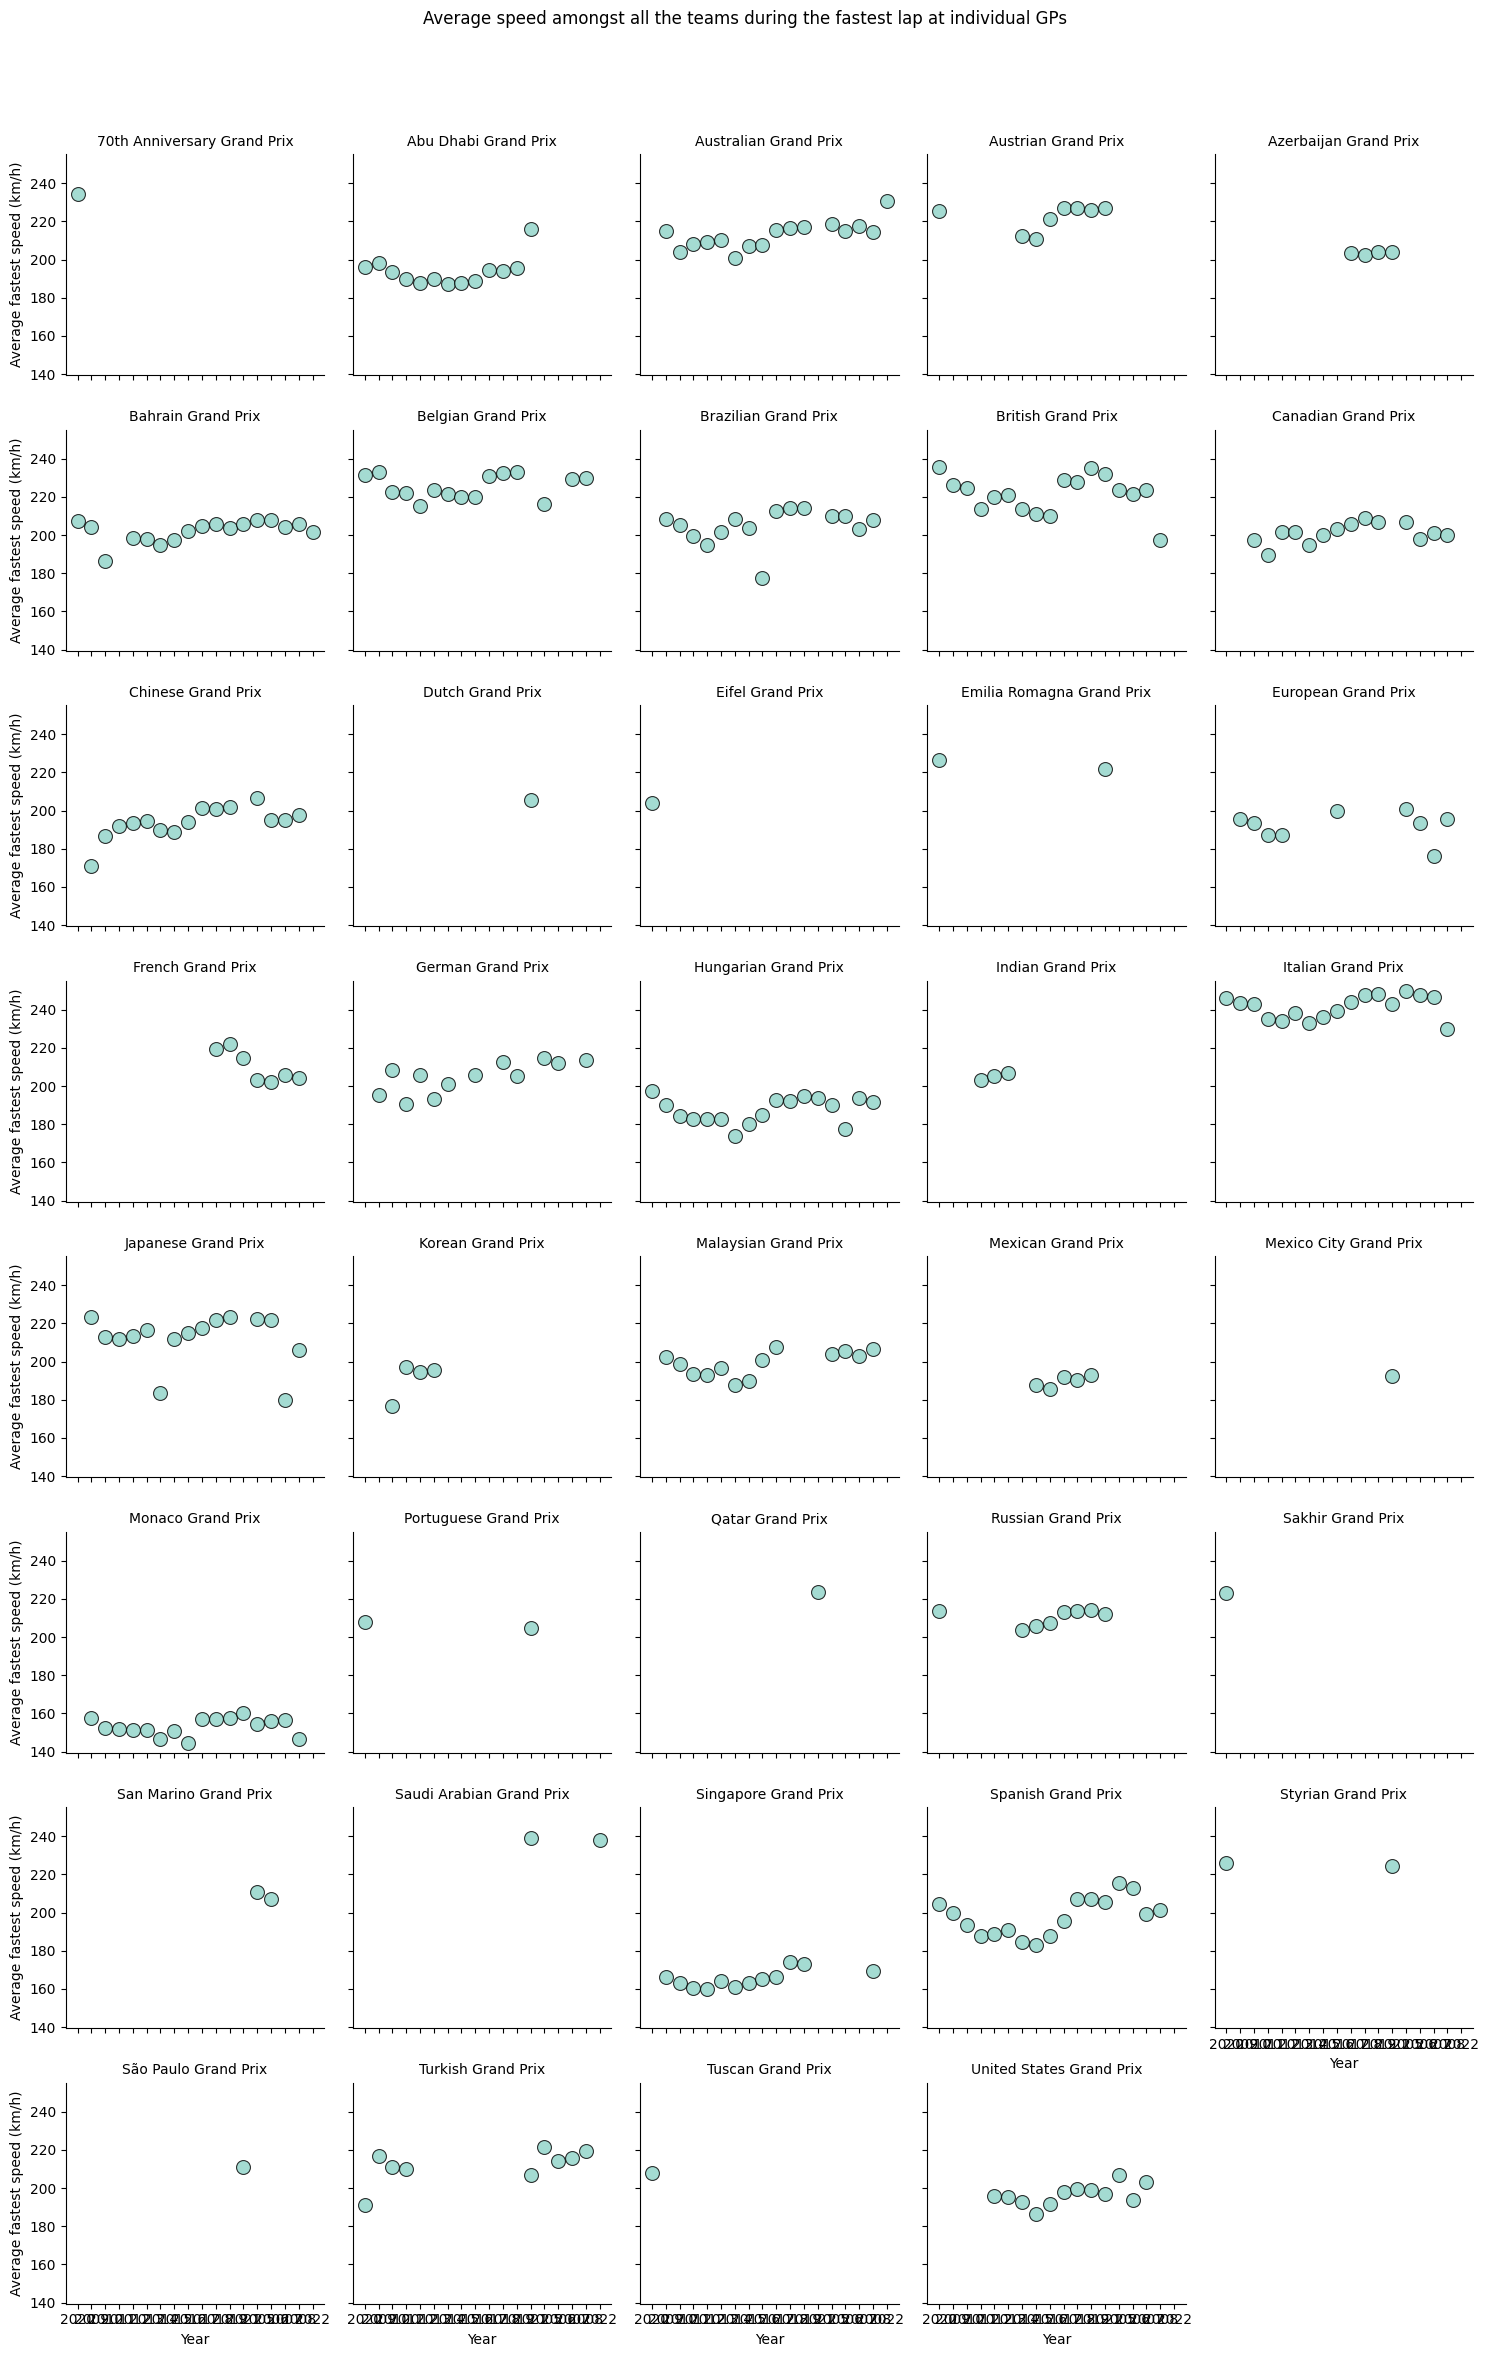

In [29]:
#create new data frame for seasons 2004 onwards - NO POSSIBLE BECAUSE NOT CONVERTED TO FLOAT
df_speed = df[df['year'] > '2004']

# Ensure the 'fastest_lap_speed' column contains only numeric values
df_speed['fastest_lap_speed'] = pd.to_numeric(df_speed['fastest_lap_speed'], errors='coerce')

# Now, drop rows with non-numeric values in the 'fastest_lap_speed' column
df_speed = df_speed.dropna(subset=['fastest_lap_speed'])

# Group and calculate the mean
df_group_speed = df_speed.groupby(['gp_name', 'year'])['fastest_lap_speed'].mean().to_frame().reset_index()

# create a facetgrid
g = sb.FacetGrid(data = df_group_speed, col = 'gp_name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha =.8, linewidth  =.8 , edgecolor = 'black', s = 100)
g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all the teams during the fastest lap at individual GPs');